# Initiation of a DataFrame

idea: [Hong Kong Airport flight schedule](https://www.hongkongairport.com/en/flights/departures/passenger.page)

Further Reference: [The API](https://data.gov.hk/tc-data/dataset/aahk-team1-flight-info)

Feel free to try

```python
import requests
import pandas as pd
import numpy as np

url = 'https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=2025-09-19&lang=en&cargo=false&arrival=false'
json_data = requests.get(url).json()

df = pd.json_normalize(json_data[1], record_path=['list'], meta = ['date']).explode('flight').explode('destination').reset_index(drop=True)
df_flight = pd.json_normalize(df.flight)
df = pd.concat([df.drop('flight', axis=1), df_flight], axis=1)

np.random.seed(9527)
df.sample(3)
```



In [ ]:
import requests
import pandas as pd
import numpy as np

url = 'https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=2025-09-23&lang=en&cargo=false&arrival=false'
json_data = requests.get(url).json()

df = pd.json_normalize(json_data[0], record_path=['list'], meta = ['date']).explode('flight').explode('destination').reset_index(drop=True)
df_flight = pd.json_normalize(df.flight)
df = pd.concat([df.drop('flight', axis=1), df_flight], axis=1)

np.random.seed(9527)
df.sample(3)

,time,status,statusCode,destination,terminal,aisle,gate,date,no,airline
757,20:30,Cancelled,None,DEL,T1,C,,2025-09-23,CX 679,CPA
443,13:40,Dep 13:58,None,PVG,T1,A,47,2025-09-23,CX 360,CPA
828,22:20,Cancelled,None,CDG,T1,D,,2025-09-23,QF 4223,QFA


In [ ]:
df

,time,status,statusCode,destination,terminal,aisle,gate,date,no,airline
0,00:05,Dep 02:15,None,CDG,T1,A,29,2025-09-23,CX 261,CPA
1,00:05,Cancelled,None,ZRH,T1,A,,2025-09-23,CX 383,CPA
2,00:05,Cancelled,None,LAX,T1,BC,,2025-09-23,CX 880,CPA
3,00:05,Cancelled,None,LAX,T1,BC,,2025-09-23,MH 9190,MAS
4,00:05,Cancelled,None,LAX,T1,BC,,2025-09-23,AA 8933,AAL
...,...,...,...,...,...,...,...,...,...,...
854,23:55,Cancelled,None,SYD,T1,A,,2025-09-23,OM 5615,MGL
855,23:55,Cancelled,None,SYD,T1,A,,2025-09-23,BA 4131,BAW
856,23:55,Cancelled,None,SYD,T1,A,,2025-09-23,LA 6096,LAN
857,23:55,Cancelled,None,FRA,T1,A,,2025-09-23,CX 289,CPA


In [ ]:
import pandas as pd

In [ ]:
# How to build a simple data frame
flights = [
    {'date': '2025-09-19 00:05', 'flight no': 'BA 4149', 'destination':'Perth', 'Check-in': 'BC'}
    , {'date': '2025-09-19 07:15', 'flight no': 'UO 618', 'destination':'Seoul', 'Check-in': 'H'}
    , {'date': '2025-09-19 14:30', 'flight no': 'PG 4558', 'destination':'Bangkok', 'Check-in': 'A'}
]
df_flights = pd.DataFrame(flights)
print(df_flights)

               date flight no destination Check-in
0  2025-09-19 00:05   BA 4149       Perth       BC
1  2025-09-19 07:15    UO 618       Seoul        H
2  2025-09-19 14:30   PG 4558     Bangkok        A


In [ ]:
# How to build a simple data frame, by columns
flights_col = {
    'data no': [1, 2, 3]
    , 'date': ['2025-09-19 00:05', '2025-09-19 07:15', '2025-09-19 14:30']
    , 'flight no': ['BA 4149', 'UO 618', 'PG 4558']
}
df_flights_col = pd.DataFrame(flights_col)
print(df_flights_col)

   data no              date flight no
0        1  2025-09-19 00:05   BA 4149
1        2  2025-09-19 07:15    UO 618
2        3  2025-09-19 14:30   PG 4558


In [ ]:
# build data frame with data number as Index
df_flights = pd.DataFrame(flights, index=[100, 101, 102])
print(df_flights)

                 date flight no destination Check-in
100  2025-09-19 00:05   BA 4149       Perth       BC
101  2025-09-19 07:15    UO 618       Seoul        H
102  2025-09-19 14:30   PG 4558     Bangkok        A


In [ ]:
df_2 = pd.DataFrame(flights)
df_2 = df_2.set_index('flight no')
df_2

,date,destination,Check-in
flight no,,,
BA 4149,2025-09-19 00:05,Perth,BC
UO 618,2025-09-19 07:15,Seoul,H
PG 4558,2025-09-19 14:30,Bangkok,A


In [ ]:
df_2.loc['PG 4558']

,PG 4558
date,2025-09-19 14:30
destination,Bangkok
Check-in,A


In [ ]:
# use loc for selecting data
print(df_flights.loc[102])

date           2025-09-19 14:30
flight no               PG 4558
destination             Bangkok
Check-in                      A
Name: 102, dtype: object


In [ ]:
print(df_flights.iloc[2])

date           2025-09-19 14:30
flight no               PG 4558
destination             Bangkok
Check-in                      A
Name: 102, dtype: object


In [ ]:
df_flights

,date,flight no,destination,Check-in
100,2025-09-19 00:05,BA 4149,Perth,BC
101,2025-09-19 07:15,UO 618,Seoul,H
102,2025-09-19 14:30,PG 4558,Bangkok,A


In [ ]:
print(df_flights[['flight no', 'destination']])

    flight no destination
100   BA 4149       Perth
101    UO 618       Seoul
102   PG 4558     Bangkok


In [ ]:
# using loc and iloc for selecting a specific data elements
print(df_flights.loc[101, 'date'])
print(df_flights.iloc[1,0])

2025-09-19 07:15
2025-09-19 07:15


# MovieLens

* [Data Source Link](https://grouplens.org/datasets/movielens/)
* The small dataset version is involved – [ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip), with 100K ratings <br/>
(Of course you can play the larger version if you are interested in)
* 4 files are consisted ([details](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html))

In [ ]:
# Download file

from urllib.request import urlretrieve
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip", "ml-latest-small.zip")

('ml-latest-small.zip', <http.client.HTTPMessage at 0x7eb4cfc5b230>)

In [ ]:
# Directly read csvs in Zip file

import zipfile

zf = zipfile.ZipFile('ml-latest-small.zip')
df_movies = pd.read_csv(zf.open('ml-latest-small/movies.csv'), dtype='str')
df_ratings = pd.read_csv(zf.open('ml-latest-small/ratings.csv'), dtype='str')

In [ ]:
# 1st step of analysis, review data frame structure.
print(df_movies.info(), "\n")
print(df_movies.describe(), "\n")
print(df_movies.head())
print(df_movies.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   object
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: object(3)
memory usage: 228.5+ KB
None 

       movieId        title genres
count     9742         9742   9742
unique    9742         9737    951
top     193609  Emma (1996)  Drama
freq         1            2   1053 

  movieId                               title  \
0       1                    Toy Story (1995)   
1       2                      Jumanji (1995)   
2       3             Grumpier Old Men (1995)   
3       4            Waiting to Exhale (1995)   
4       5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Ro

In [ ]:
# get df row and columns
print(df_movies.shape)

(9742, 3)


In [ ]:
# when you used the zip handler, please close it.
zf.close()

In [ ]:
# count the unique number of movies
df_movies['movieId'].nunique()

9742

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df = df_ratings.merge(df_movies, how='left', on= 'movieId')
print(df.tail())

       userId movieId rating   timestamp                           title  \
100831    610  166534    4.0  1493848402                    Split (2017)   
100832    610  168248    5.0  1493850091   John Wick: Chapter Two (2017)   
100833    610  168250    5.0  1494273047                  Get Out (2017)   
100834    610  168252    5.0  1493846352                    Logan (2017)   
100835    610  170875    3.0  1493846415  The Fate of the Furious (2017)   

                             genres  
100831        Drama|Horror|Thriller  
100832        Action|Crime|Thriller  
100833                       Horror  
100834                Action|Sci-Fi  
100835  Action|Crime|Drama|Thriller  


In [ ]:
#Find the peak month users rate movies
df['datetime'] = pd.to_datetime(df.timestamp, unit='s')
df['months'] = df['datetime'].dt.month

/tmp/ipython-input-3542680303.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['datetime'] = pd.to_datetime(df.timestamp, unit='s')


In [ ]:
df.head()

,userId,movieId,rating,timestamp,title,genres,datetime,months
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03,7
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,2000-07-30 18:20:47,7
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,2000-07-30 18:37:04,7
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,2000-07-30 19:03:35,7
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,2000-07-30 18:48:51,7


In [ ]:
df['months'].value_counts()

,count
months,
5,10883
11,9676
8,9074
3,8880
6,8825
1,8684
9,8510
4,7727
2,7635


In [ ]:
#Find the peak hour users rate movies
df['hours'] = df.datetime.dt.hour
print(df['hours'].value_counts().index.values[0], 'th hour is the peak hour')

20 th hour is the peak hour


In [ ]:
df['hours'].value_counts().index[0]

np.int32(20)

/tmp/ipython-input-2889536416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'hours', palette='Purples')


<Axes: xlabel='hours', ylabel='count'>

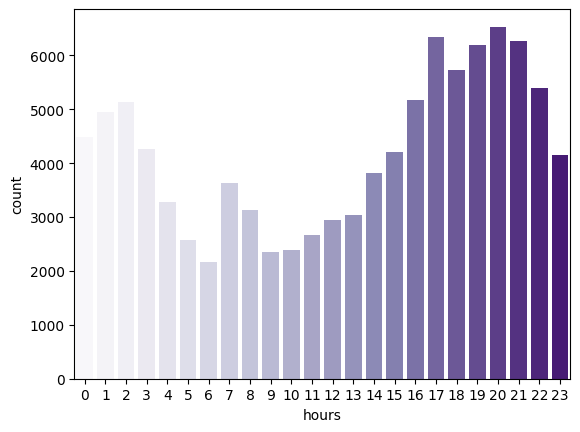

In [ ]:
import seaborn as sns
sns.countplot(data = df, x = 'hours', palette='Purples')

# Chunk in read_csv

In [ ]:
import zipfile

zf = zipfile.ZipFile('ml-latest-small.zip')

In [ ]:
iter_df_movies = pd.read_csv(zf.open('ml-latest-small/movies.csv'), chunksize=1024)

In [ ]:
type(iter_df_movies)

pandas.io.parsers.readers.TextFileReader

In [ ]:
# iterate for each small chunk
df_movies_mini = next(iter_df_movies)
print(df_movies_mini.head(1), df_movies_mini.tail(1))

   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy       movieId             title         genres
1023     1334  Blob, The (1958)  Horror|Sci-Fi


In [ ]:
# iterate for each small chunk
df_movies_mini = next(iter_df_movies)
print(df_movies_mini.head(1), df_movies_mini.tail(1))

      movieId               title          genres
1024     1335  Blood Beach (1981)  Horror|Mystery       movieId                title           genres
2047     2726  Killing, The (1956)  Crime|Film-Noir


In [ ]:
# for loops
for df_movies_mini in iter_df_movies:
    print("Reading rows", df_movies_mini.index[0], df_movies_mini.index[-1])

Reading rows 2048 3071
Reading rows 3072 4095
Reading rows 4096 5119
Reading rows 5120 6143
Reading rows 6144 7167
Reading rows 7168 8191
Reading rows 8192 9215
Reading rows 9216 9741


In [ ]:
next(iter_df_movies)

StopIteration: 

# Generators

In [ ]:
def gen_example():
    n = 1
    print('This is printed first')
    # Generator function contains yield statements
    yield n

    n += 1
    print('This is printed second')
    yield n

    n += 1
    print('This is printed at last')
    yield n

In [ ]:
g_eg = gen_example()
print(g_eg)

<generator object gen_example at 0x7eb4c3ce3c40>


In [ ]:
print(next(g_eg))

This is printed first
1


In [ ]:
def processing_rows(zipfilename, csvfile):
    zf_gen = zipfile.ZipFile(zipfilename)
    iter_df_movies = pd.read_csv(zf.open(csvfile), chunksize=1024)
    for df_movies_mini in iter_df_movies:
        yield (df_movies_mini.index[0], df_movies_mini.index[-1])

g_df = processing_rows('ml-latest-small.zip', 'ml-latest-small/movies.csv')
print(g_df)

<generator object processing_rows at 0x7eb4cfc333d0>


In [ ]:
next(g_df)

(0, 1023)

In [ ]:
for g_df_out in g_df:
    print("Reading rows", g_df_out)

Reading rows (1024, 2047)
Reading rows (2048, 3071)
Reading rows (3072, 4095)
Reading rows (4096, 5119)
Reading rows (5120, 6143)
Reading rows (6144, 7167)
Reading rows (7168, 8191)
Reading rows (8192, 9215)
Reading rows (9216, 9741)
